# Import Dependencies

In [1]:
import re
import pickle
import datetime
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm
from bs4 import BeautifulSoup
from IPython.display import display
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

## Load data

In [2]:
# Read data from csv file

data = pd.read_csv('Final_data.csv', encoding='UTF-8')

# display first 5 rows of dataset
display(data.head())

,State_Name,Crop_Year,Area,Yield,Temperature,Precipitation,Humidity,Soil_type:_aluvial,Soil_type:_clay,Soil_type:_loamy,...,District:_MURANGA,District:_NANDI,District:_NYANDARUA,District:_NYERI,Crop:_Maize,Crop:_Beans,Crop:_Rice,Season:_Hot,Season:_Wet,Season:_Cold
0,Kenya,1997,598400,217000,24.2430,42.3484,84,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,Kenya,1998,453200,227900,23.1000,48.7838,70,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,Kenya,1999,498300,190900,22.8118,39.5078,35,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,Kenya,2000,518700,160800,23.2746,39.2558,33,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,Kenya,2001,528900,175000,23.5674,34.0668,29,0,1,0,...,0,0,0,0,0,1,0,0,1,0


## Plots

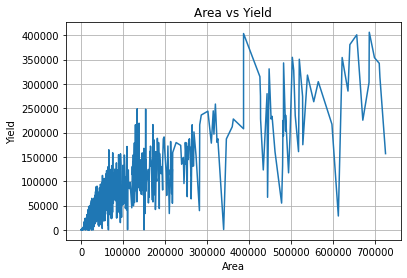

In [3]:
# Plot the relation between area and yield

area_, yield_ = zip(*sorted(zip(data['Area'], data['Yield'])))      # sort data based on area with its corresponding yield value
plt.title("Area vs Yield")
plt.xlabel("Area")
plt.ylabel("Yield")
plt.grid()
plt.plot(area_, yield_)

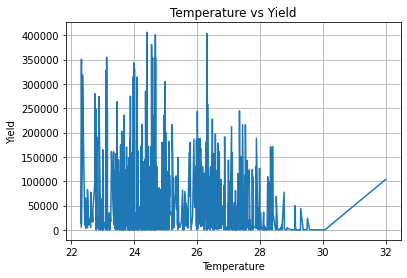

In [4]:
# Plot the relation between temperature and yield

temp_, yield_ = zip(*sorted(zip(data.loc[data['Temperature'] <= 100, 'Temperature'], data['Yield'])))    # sort data based on temp (<=100) with its corresponding yield value
plt.title("Temperature vs Yield")
plt.xlabel("Temperature")
plt.ylabel("Yield")
plt.grid()
plt.plot(temp_, yield_)

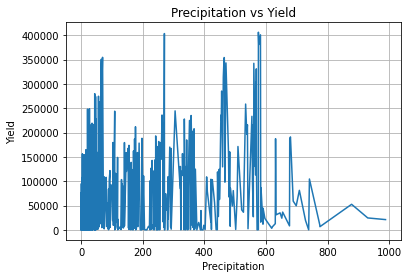

In [5]:
# Plot the relation between precipitation and yield

preci_, yield_ = zip(*sorted(zip(data['Precipitation'], data['Yield'])))     # sort data based on precipitaion with its corresponding yield value
plt.title("Precipitation vs Yield")
plt.xlabel("Precipitation")
plt.ylabel("Yield")
plt.grid()
plt.plot(preci_, yield_)

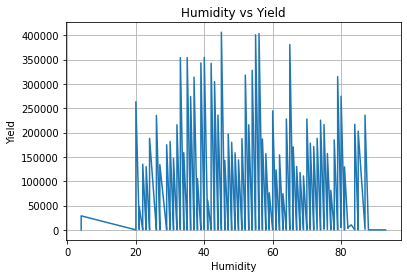

In [6]:
# Plot the relation between humidity and yield

humi_, yield_ = zip(*sorted(zip(data['Humidity'], data['Yield'])))      # sort data based on humidity with its corresponding yield value
plt.title("Humidity vs Yield")
plt.xlabel("Humidity")
plt.ylabel("Yield")
plt.grid()
plt.plot(humi_, yield_)

# Model Training

In [7]:
predictors = data.columns.drop(['State_Name', 'Crop_Year', 'Yield'])     # Remove columns that do not affect yield / are undesired
target = 'Yield'                                                         # set feature to be predicted

In [8]:
X = data[predictors]          # store input features matrix in X
y = data[target]              # store target variable vector in Y

In [9]:
# Split data into train and test set

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0)       # Default split of 75:25 for train:test resp.
print(f"Train set size: {len(train_X)}\nTest set size: {len(test_X)}")

Train set size: 1008
Test set size: 337


In [10]:
# Set parameters to make combinations from for training the model. One value is taken from each parameter for every iteration
# Ex: (n_estimators, max_dept, min_samples_split): (50, None, 2), (50, None, 4).... and so on

params = {'n_estimators': [50, 100, 150, 200],                           # or use list(range(start, stop, step))
              'max_depth': [None, 10, 20, 50, 100], 
              'min_samples_split': [2, 4, 6, 8, 10]
             }

# Choose base estimator
RanFor = RandomForestRegressor()

# perform grid search over the parameters with 3-fold Cross Validation
clf = GridSearchCV(RanFor, params, cv=3)

clf.fit(train_X, train_y)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 50, 100],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [11]:
model = clf.best_estimator_
res = model.score(test_X, test_y)*100
print(f"Accuracy using RandomForestRegressor: {res:.2f}%")

Accuracy using RandomForestRegressor: 92.84%


In [12]:
from sklearn.tree import DecisionTreeClassifier 

In [13]:
params = {'n_estimators': [50, 100, 150, 200],                           # or use list(range(start, stop, step))
              'max_depth': [None, 10, 20, 50, 100], 
              'min_samples_split': [2, 4, 6, 8, 10]
             }

classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier = GridSearchCV(RanFor, params, cv=3)
classifier.fit(train_X, train_y)



GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 50, 100],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [15]:
model = classifier.best_estimator_
res = model.score(test_X, test_y)*100
print(f"Accuracy using DecisionTreeClassifier model: {res:.2f}%")

Accuracy using DecisionTreeClassifier model: 92.38%


In [16]:
##from sklearn.metrics import confusion_matrix 

In [17]:
##cm=confusion_matrix(test_X, test_y)

In [18]:
# select best estimator

model = clf.best_estimator_

In [19]:
# check result on hold-out test set (unseen data) and print accuracy

res = model.score(test_X, test_y)*100
print(f"Accuracy using best model: {res:.2f}%")

Accuracy using best model: 92.31%


### Save & load model

In [20]:
# Save model

today = datetime.datetime.today().strftime('%Y-%m-%d')
with open(f"RF_model_{today}", "wb") as f:
    pickle.dump(model, f)

In [21]:
# Load model

with open(f"RF_model_2021-02-09", "rb") as x:
    model = pickle.load(x)